### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting.

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.




(1) What is the independent variable? What is the dependent variable?

The independent variable is whether the word name and font color were the same or different.

The dependent variable is the reaction time (RT) of the participant to name the font color of the word.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Since the participants are asked to perform the tasks under both the congruent and the incongruent word condition, the same participant is tested for each condition. Hence, a Paired T-Test can be used, assuming that the population is normally distributed. Additionally, it should be noted that a t-score should be used since the sample size is below 30 and the population standard deviation is unknown.

Here are the hypotheses: 

Null Hypothesis (H0): No difference in population means of response time under incongruent and congruent conditions, i.e.

    H0: μC = μI

Alternate Hypothesis (H1): Population means under the incongruent condition will be greater than population means under the congruent condition, i.e.

    HA:  μI > μC

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Required libraries throughout this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('stroopdata.csv')

In [4]:
# To get some desriptive statistics

df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### Central Tendency measure:

the sample means (Xbars) for the two population samples are reported in the above. Please note that the xbars are the unbiased estimator of the Mean populations. The 50% datapoints in the above table represent the sample medians. Both the sample means and medians are among measure of central tendency.

### Variability measure:

the stds (Sample Standard Deviation) for the two dataset are reported in the above. Sample Standard Deviation (Std) can be used to estimate the population Variance, and it is a measure of variability.

### Stroop Data Descriptive Statistics:

The same descriptive statistics table along with the central tendency and variability measures can be calculated for the paired dataset (The Difference column):

In [6]:
# Create the paired dataset (the difference between the conditions):

congruent_data = df["Congruent"]
incongruent_data = df["Incongruent"]
df["Difference"] = df["Congruent"] - df["Incongruent"]
df.describe()


,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,'Frequency')

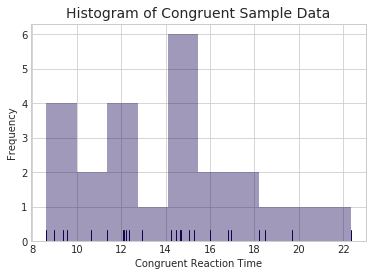

In [16]:
#Distribution Congruent Data
sns.set_style('whitegrid')
g = sns.distplot(df['Congruent'],rug=True,color="#160050",bins=10,kde=False)
g.axes.set_title('Histogram of Congruent Sample Data', fontsize=14)
plt.xlabel("Congruent Reaction Time")
plt.ylabel("Frequency")

### The visualization shows that the distribution of the congruent reaction times is relatively normal. The reaction time is mostly around 15.  

Text(0,0.5,'Frequency')

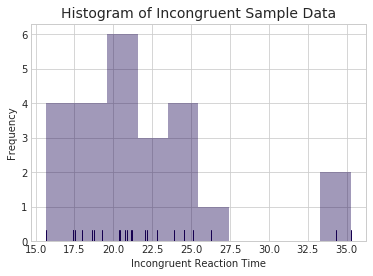

In [17]:
#Distribution Incongruent Data
sns.set_style('whitegrid')
g = sns.distplot(df['Difference'],rug=True,color="#160050",bins=10,kde=False)
g.axes.set_title('Histogram of Incongruent Sample Data', fontsize=14)
plt.xlabel("Incongruent Reaction Time")
plt.ylabel("Frequency")

### The visualization shows that the incongruent reaction times is skewed to the right. As it can be seen from the graph, the majority of participants completed the test between 17.5-21 seconds. Furthermore, there are some outliers completing the test in about 35 seconds. 

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [19]:
# Calculations for a sample t-value
tval = stats.ttest_rel(incongruent_data, congruent_data)
tstat = tval[0]
pvalue = tval[1]
print ("t-value = " + '%.2f' % tstat) 
print ("p-value = " + '%.8f' % pvalue)

t-value = 8.02
p-value = 0.00000004


Based on the above results, here are the answers to the questions in this section:

### Confidence Level = 95%

### Significance Level α = 5%

### one-tailed critical statistic value = 1.714 (degrees of freedom used to get the critical statistic value: 23)

### calculated t-value = 8.02 and p-value = 0.00000004.


1- At α = .05 and 23 degrees of freedom, the critical statistic value for a one-tailed test is 1.714. 

2- The calculated t-value is 8.02.

3- The calculated t-value is greater than the critical t-value. Furthermore, the p-value is less than the alpha level: p-value < .05. Hence, the null hypothesis is rejected, i.e. there is sufficient evidence to support the alternate hypothesis which states that it takes less time to read the word out loud than it does to say the color of ink the word is printed. 
This was the expected outcome, as the sample means had a big gap (22 versus 14). More importantly,the Stroop Experiment has shown the reason for the reaction time delay which is due to interfering signals in the brain that are completing for one's attention.

### References:
    
https://statistics.laerd.com/stata-tutorials/paired-t-test-using-stata.php

https://youtu.be/UAKAlP1B5WY

https://pandas.pydata.org/pandas-docs/stable/visualization.html